# PREDICTING HEART DISEASE

We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not. We will use logistic regression (classification) algorithm.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
#matplotlib inline 

In [2]:
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [4]:
data.isnull().sum()   #checking for missing values 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#descriptive statistics of the data 
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# DATA EXPLORATION

In [7]:
data['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

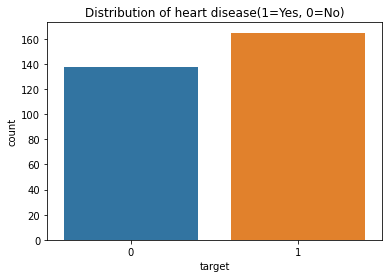

In [8]:
plt.title('Distribution of heart disease(1=Yes, 0=No)')
sns.countplot(data['target'])
plt.show()

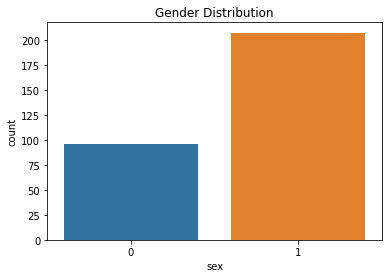

In [9]:
plt.title('Gender Distribution')

sns.countplot(data['sex'])

plt.show()

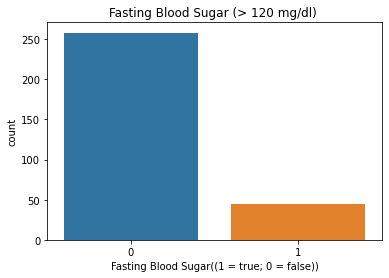

In [10]:
plt.title('Fasting Blood Sugar (> 120 mg/dl) ')
sns.countplot(data['fbs'])
plt.xlabel('Fasting Blood Sugar((1 = true; 0 = false))')
plt.show()

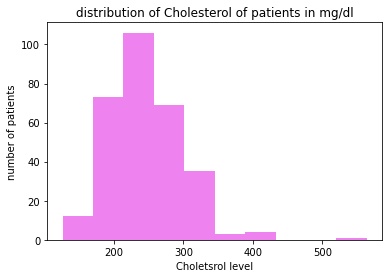

In [11]:
plt.title('distribution of Cholesterol of patients in mg/dl')
plt.hist(data['chol'],color='violet')
plt.xlabel('Choletsrol level')
plt.ylabel('number of patients')
plt.show()

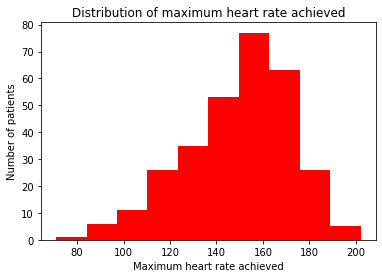

In [12]:
plt.title('Distribution of maximum heart rate achieved')
plt.hist(data['thalach'],bins=10,color='red')
plt.xlabel('Maximum heart rate achieved')
plt.ylabel('Number of patients')
plt.show()

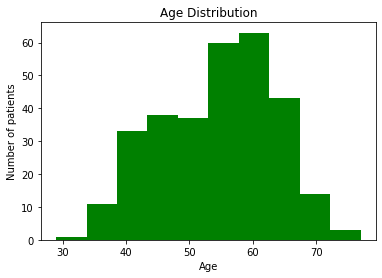

In [13]:
plt.title('Age Distribution')
plt.hist(data['age'],bins=10,color='green')
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.show()

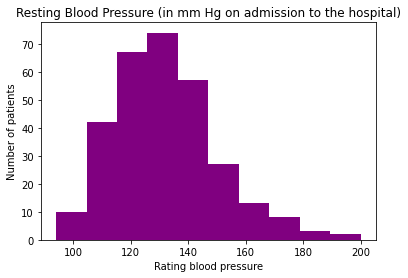

In [14]:
plt.title('Resting Blood Pressure (in mm Hg on admission to the hospital)')
plt.hist(data['trestbps'],color='purple')
plt.xlabel('Rating blood pressure')
plt.ylabel('Number of patients')
plt.show()

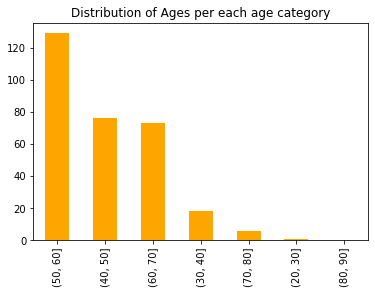

In [15]:
plt.title('Distribution of Ages per each age category')
bins=[20,30,40,50,60,70,80,90]
data['Age']=pd.cut(data['age'],bins)
(data['Age']).value_counts().plot.bar(color='orange')
plt.show()

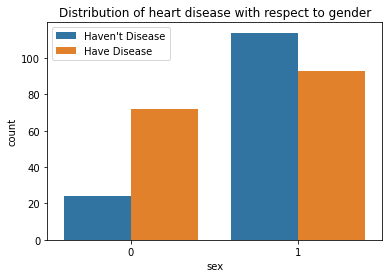

target    0   1
sex            
0        24  72
1       114  93


In [16]:
plt.title('Distribution of heart disease with respect to gender')
sns.countplot(data['sex'],hue=data['target'])
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()
print(pd.crosstab(data['sex'],data['target']))

In [17]:
data['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

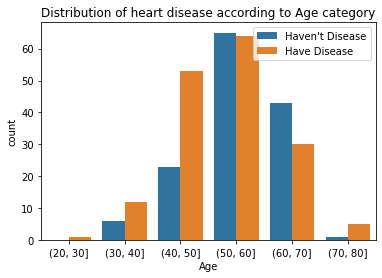

In [18]:
plt.title('Distribution of heart disease according to Age category')
bins=[20,30,40,50,60,70,80]
data['Age']=pd.cut(data['age'],bins)
sns.countplot(data['Age'],hue=data['target'])
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

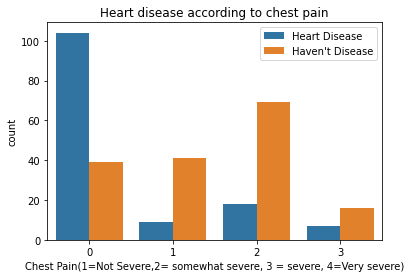

In [19]:
plt.title('Heart disease according to chest pain')
sns.countplot(data['cp'],hue=data['target'])
plt.xlabel('Chest Pain(1=Not Severe,2= somewhat severe, 3 = severe, 4=Very severe)')
plt.legend(["Heart Disease","Haven't Disease"])
plt.show()

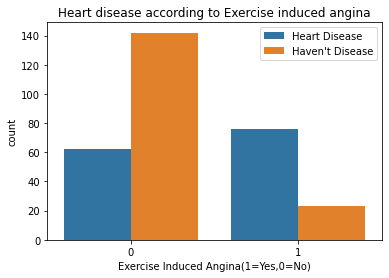

In [20]:
plt.title('Heart disease according to Exercise induced angina')
sns.countplot(data['exang'],hue=data['target'])
plt.xlabel('Exercise Induced Angina(1=Yes,0=No)')
plt.legend(["Heart Disease","Haven't Disease"])
plt.show()

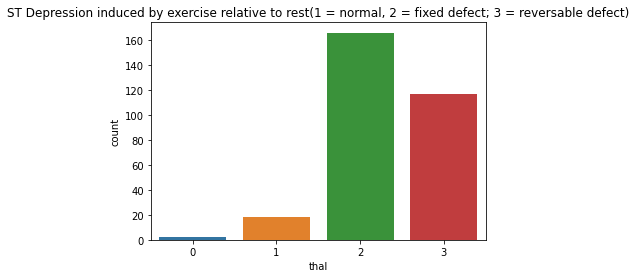

In [21]:
plt.title('ST Depression induced by exercise relative to rest(1 = normal, 2 = fixed defect; 3 = reversable defect)')
sns.countplot(data['thal'])
plt.show()

In [22]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'Age'],
      dtype='object')

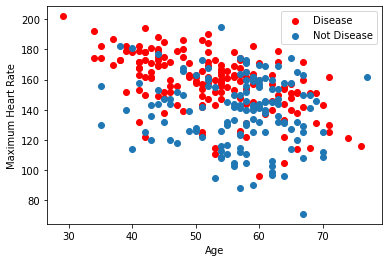

In [23]:
plt.scatter(data.age[data.target==1], data.thalach[(data.target==1)], c="red")
plt.scatter(data.age[data.target==0], data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

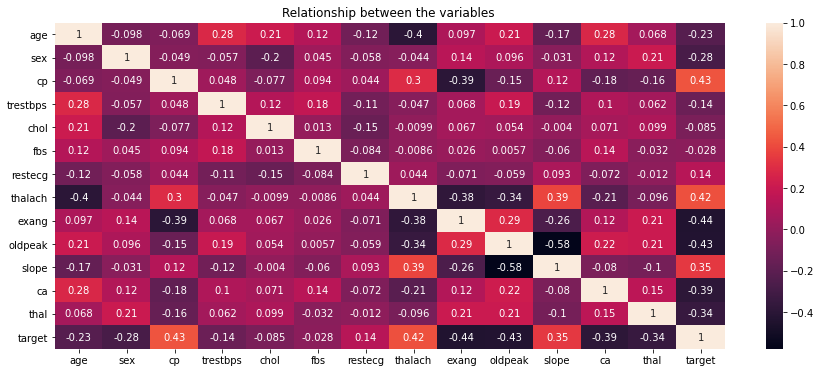

In [24]:
plt.figure(figsize=(15,6))
plt.title('Relationship between the variables ')
sns.heatmap(data.corr(),annot=True)
plt.show()

In [25]:
##creating dummy variables for categorical values.
from sklearn.preprocessing import OneHotEncoder
data['cp'] = pd.get_dummies(data['cp'])
data['thal'] = pd.get_dummies(data['thal'])
data['slope'] = pd.get_dummies(data['slope'])

# PREDICTIVE ANALYSIS

In [26]:
##label
y=data.iloc[:,13]
#explainatory variables 
X=data.iloc[:,0:13]


In [27]:
from sklearn.model_selection import KFold

In [28]:
#standardize data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit_transform(X)

array([[0.70833333, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.16666667, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.25      , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.8125    , 1.        , 1.        , ..., 0.        , 0.5       ,
        0.        ],
       [0.58333333, 1.        , 1.        , ..., 0.        , 0.25      ,
        0.        ],
       [0.58333333, 0.        , 0.        , ..., 0.        , 0.25      ,
        0.        ]])

In [29]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print('X train: ',  X_train.shape)
print('x test: ', X_test.shape)

X train:  (242, 13)
x test:  (61, 13)


# LOGISTIC REGRESSION 

In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=42)
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
print(lr.get_params())


#importing libraries for model evaluation 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print(classification_report(lr_pred,y_test))
print('ROC SCORE:', roc_auc_score(lr_pred,y_test)*100)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        24
           1       0.88      0.81      0.85        37

    accuracy                           0.82        61
   macro avg       0.81      0.82      0.81        61
weighted avg       0.83      0.82      0.82        61

ROC SCORE: 82.2072072072072


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# RANDOM FOREST 

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print(rf.get_params())

#importing rfe 
from sklearn.feature_selection import RFE
rfe=RFE(rf, n_features_to_select=4,step=1)
rfe=rfe.fit(X,y)
#print summaries for the selection of attributes 
print(rfe.support_)
print(rfe.ranking_)

#importing libraries for model evaluation 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print(classification_report(rf_pred,y_test))
print('ROC SCORE:', roc_auc_score(rf_pred,y_test)*100)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
[ True False  True False False False False  True False  True False False
 False]
[ 1  6  1  4  3  8  7  1  5  1  9  2 10]
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        25
           1       0.85      0.81      0.83        36

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

ROC SCORE: 80.27777777777779


# GRADIENT BOOSTING

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred=gb.predict(X_test)
print(gb.get_params())

#importing rfe 
from sklearn.feature_selection import RFE
rfe=RFE(gb, n_features_to_select=4,step=1)
rfe=rfe.fit(X,y)
#print summaries for the selection of attributes 
print(rfe.support_)
print(rfe.ranking_)

#importing libraries for model evaluation 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print(classification_report(gb_pred,y_test))
print('ROC SCORE:', roc_auc_score(gb_pred,y_test)*100)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
[False False  True False  True False False False False  True False  True
 False]
[ 2  4  1  6  1  9  7  3  5  1  8  1 10]
              precision    recall  f1-score   support

           0       0.74      0.77      0.75        26
           1       0.82      0.80      0.81        35

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61

ROC SCORE: 78.46153846153847


# SVM

In [33]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)
sv_pred=sv.predict(X_test)
print(sv.get_params())

#importing libraries for model evaluation 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print(classification_report(sv_pred,y_test))
print('ROC SCORE:', roc_auc_score(sv_pred,y_test)*100)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
              precision    recall  f1-score   support

           0       0.48      0.72      0.58        18
           1       0.85      0.67      0.75        43

    accuracy                           0.69        61
   macro avg       0.67      0.70      0.67        61
weighted avg       0.74      0.69      0.70        61

ROC SCORE: 69.83204134366925


# KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)
kn_pred=kn.predict(X_test)
print(kn.get_params())

#importing libraries for model evaluation 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print(classification_report(kn_pred,y_test))
print('ROC SCORE:', roc_auc_score(kn_pred,y_test)*100)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.63      0.59      0.61        29
           1       0.65      0.69      0.67        32

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61

ROC SCORE: 63.685344827586206


In [35]:
from sklearn.model_selection import cross_val_score, KFold

In [36]:
lr_kfold=LogisticRegression()
folds=KFold
kfold=folds(n_splits=10,random_state=100)

kfold_scores=cross_val_score(lr_kfold,X_train,y_train,cv=kfold)
print(kfold_scores.mean()*100)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

83.93333333333332


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
##saving the logistic regression model
import pickle 
file=open('HeartDiseaseLogistic.pkl','wb')
pickle.dump(lr_kfold,file)
models=pickle.load(open('HeartDiseaseLogistic.pkl','rb'))